## Import libraries and add dependencies

In [1]:
#!pip install tensorflow opencv-python mediapipe sklearn matplotlib

In [2]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

In [3]:
mp_holistic=mp.solutions.holistic # holistic model
mp_drawing = mp.solutions.drawing_utils #drawing utilities

In [4]:
def mediapipe_detection(image,model):
    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)# color conversion
    image.flags.writeable=False
    results= model.process(image)
    image.flags.writeable=True
    image= cv2.cvtColor(image, cv2.COLOR_RGB2BGR)# color conversion
    return image,results

In [5]:
# cv2.cvtColor??
def draw_landmarks(image,results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION)# fACEMESH_CONTOURS
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)

In [6]:
def draw_styled_landmarks(image,results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION,
                             mp_drawing.DrawingSpec(color=(82,82,83),thickness=1,circle_radius=1),
                             mp_drawing.DrawingSpec(color=(82,82,83),thickness=1,circle_radius=1)
                             ) # FACEMESH_CONTOURS
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(150,100,100),thickness=1,circle_radius=2),
                             mp_drawing.DrawingSpec(color=(100,250,160),thickness=1,circle_radius=2)
                             )
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(130,130,130),thickness=2,circle_radius=3),
                             mp_drawing.DrawingSpec(color=(80,120,250),thickness=2,circle_radius=3)
                             )
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(70,150,10),thickness=2,circle_radius=3),
                             mp_drawing.DrawingSpec(color=(180,80,12),thickness=2,circle_radius=3)
                             )

In [ ]:
mp_holistic.FACEMESH_TESSELATION??

In [ ]:
mp_drawing.draw_landmarks??

In [17]:
cap= cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.5,min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        # Read Feed
        ret,frame= cap.read()
        # Make detections
        image, results= mediapipe_detection(frame,holistic)
        print(results)
        # DRaw landmarks
        draw_styled_landmarks(image,results)
        # Show to Screen
        cv2.imshow('OpenCV Feed', image)
        # Break gracefully
        if cv2.waitKey(10) & 0xFF==ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [18]:
len(results.face_landmarks.landmark)

468

In [19]:
frame

array([[[230, 255, 255],
        [228, 255, 255],
        [214, 245, 249],
        ...,
        [161, 169, 170],
        [160, 170, 169],
        [160, 170, 169]],

       [[230, 255, 255],
        [229, 255, 255],
        [221, 251, 255],
        ...,
        [160, 169, 171],
        [160, 169, 171],
        [160, 169, 171]],

       [[230, 255, 255],
        [230, 255, 255],
        [229, 255, 255],
        ...,
        [160, 169, 170],
        [160, 170, 169],
        [160, 170, 169]],

       ...,

       [[134, 131, 133],
        [134, 131, 132],
        [134, 131, 132],
        ...,
        [ 18,  99, 138],
        [ 23, 104, 119],
        [ 25, 106, 118]],

       [[134, 131, 132],
        [134, 131, 132],
        [134, 131, 132],
        ...,
        [ 23, 102, 149],
        [ 31, 109, 125],
        [  4,  82,  94]],

       [[134, 131, 132],
        [134, 131, 132],
        [134, 131, 132],
        ...,
        [ 40, 118, 166],
        [ 43, 117, 133],
        [ 25,  98, 110]]

In [20]:
draw_landmarks(frame,results)

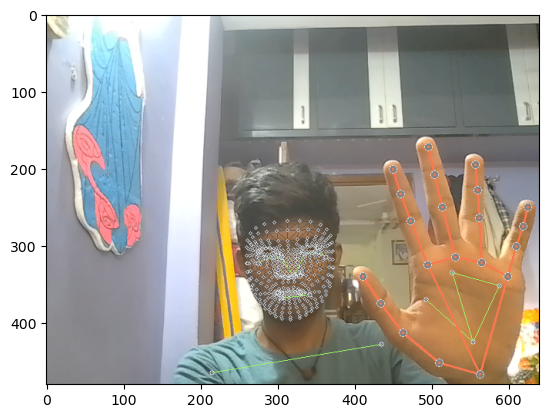

In [21]:
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))

In [25]:
results.pose_landmarks
len(results.left_hand_landmarks.landmark)

21

In [ ]:
# pose=[]
# for res in results.pose_landmarks.landmark:
#     test=np.array([res.x,res.y,res.z,res.visibility])
#     pose.append(test)

## Extract Keypoints

In [26]:
pose=np.array([[res.x,res.y,res.z,res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
face=np.array([[res.x,res.y,res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh=np.array([[res.x,res.y,res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
rh=np.array([[res.x,res.y,res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)


In [27]:
pose.shape
len(results.face_landmarks.landmark)
rh
lh

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [28]:
def extract_keypoints(results):
    pose=np.array([[res.x,res.y,res.z,res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
    face=np.array([[res.x,res.y,res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
    lh=np.array([[res.x,res.y,res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    rh=np.array([[res.x,res.y,res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose,face,lh,rh])

In [29]:
# 468*3 + 33*4 + 21*3 + 21*3 
# extract_keypoints(results).shape
result_test=extract_keypoints(results)
result_test

array([ 0.5021916 ,  0.70871317, -0.53394419, ...,  0.97794485,
        0.5221433 , -0.09021546])

In [ ]:
# to save a numpy array
np.save('0_file',result_test)
np.load('0_file')

### Setup folder for collection

In [34]:
DATA_PATH= os.path.join('MP_Data')

# Actions that we try to detect
actions= np.array(['hello','thanks','iloveyou'])
# 30 videos of data
no_sequences=30
# each of 30 frames in length
sequence_length=30

In [35]:
for action in actions:
    for sequence in range(no_sequences):
        try:
            os.makedirs(os.path.join(DATA_PATH,action,str(sequence)))
        except:
            pass

### Collect keypoint values for training and testing

In [ ]:
cap= cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.5,min_tracking_confidence=0.5) as holistic:
    # loop through actions
    for action in actions:
        # loop through sequence aks videos
        for sequence in range(no_sequences):
            # loop through video length aka sequence length
            for frame_num in range(sequence_length):
                
                # Read Feed
                ret,frame= cap.read()
                # Make detections
                image, results= mediapipe_detection(frame,holistic)
                print(results)
                # DRaw landmarks
                draw_styled_landmarks(image,results)
                # Apply collection logic
                if frame_num==0:
                    cv2.putText(image,'STARTING COLLECTION',(120,200),
                               cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),2,cv2.LINE_AA)
                    cv2.putText(image,f'Collecting frames for {action} Video NUmber {sequence}',(20,50),
                               cv2.FONT_HERSHEY_SIMPLEX,0.5,(0,255,0),1,cv2.LINE_AA)
                    cv2.waitKey(2000)
                else:    
                    cv2.putText(image,f'Collecting frames for {action} Video NUmber {sequence}',(20,50),
                               cv2.FONT_HERSHEY_SIMPLEX,0.5,(0,255,0),1,cv2.LINE_AA)
                # Export keypoints to respective folders
                keypoints= extract_keypoints(results)
                npy_path=os.path.join(DATA_PATH,action,str(sequence),str(frame_num))
                np.save(npy_path,keypoints)
                # Show to Screen
                cv2.imshow('OpenCV Feed', image)
                
                # Break gracefully
                if cv2.waitKey(10) & 0xFF==ord('q'):
                    break
    cap.release()
    cv2.destroyAllWindows()

In [ ]:
# cap.release()
# cv2.destroyAllWindows()

### Preprocess data and create labels and features

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [ ]:
label_map= {label: num for num,label in enumerate(actions)}

In [ ]:
label_map

In [ ]:
sequences, labels= [],[]
for action in actions:
    for sequence in range(no_sequences):
        window=[]
        for frame_num in range(sequence_length):
            res= np.load(os.path.join(DATA_PATH,action,str(sequence),f'{frame_num}.npy'))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [ ]:
np.array(sequences).shape

In [ ]:
np.array(labels).shape

In [ ]:
X=np.array(sequences)
X.shape

In [ ]:
y=to_categorical(labels).astype(int)
y.shape

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.05)

In [ ]:
# X_test.shape
X_train.shape

### Build and test LSTM Neuaral Network

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [ ]:
log_dir=os.path.join('Logs')
tb_callback= TensorBoard(log_dir=log_dir)

In [ ]:
model=Sequential()
model.add(LSTM(64,return_sequences=True,activation='relu',input_shape=(30,1662)))
model.add(LSTM(128,return_sequences=True,activation='relu'))
model.add(LSTM(64,return_sequences=False,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(actions.shape[0],activation='softmax'))

In [ ]:
model

In [ ]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['categorical_accuracy'])

In [ ]:
model.fit(X_train,y_train,epochs=500,callbacks=[tb_callback])

In [ ]:
model.summary()

In [ ]:
y_pred= model.predict(X_test)

In [ ]:
actions[np.argmax(y_pred[3])]

In [ ]:
actions[np.argmax(y_test[3])]

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [ ]:
y_true=np.argmax(y_test,axis=1).tolist()
y_pred=np.argmax(y_pred,axis=1).tolist()

In [ ]:
y_pred